# Build a CNN model

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

from tools import pretraitement
import random
import os
import json

2021-12-07 14:56:07.821406: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-07 14:56:07.821497: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# Chargement du jeu de données
(x_train_origin, y_train_origin), (x_test_origin, y_test_origin) = tf.keras.datasets.cifar10.load_data()
assert x_train_origin.shape == (50000, 32, 32, 3)
assert x_test_origin.shape == (10000, 32, 32, 3)
assert y_train_origin.shape == (50000, 1)
assert y_test_origin.shape == (10000, 1)

In [3]:
# pretraitement des données
(x_train, y_train) = pretraitement.normalize_dataset(x_train_origin, y_train_origin)

(x_test, y_test) = pretraitement.normalize_dataset(x_test_origin, y_test_origin)

In [4]:
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 10)
assert y_test.shape == (10000, 10)

In [6]:
# Construction d'un CNN

# La base CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2))) 

# Ajout de couches denses vers la fin du model
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [21]:
model_config = json.loads(model.to_json())
layers = [layer['class_name'] for layer in model_config['config']['layers']]

['InputLayer', 'Conv2D', 'MaxPooling2D', 'Conv2D', 'MaxPooling2D', 'Conv2D', 'MaxPooling2D', 'Flatten', 'Dense', 'Dropout', 'Dense']


## Model training

In [6]:
# Compiling model

## training parameters
learning_rate = 0.001
loss='mean_squared_error'
#loss='categorical_crossentropy'
optimizers={'adam'=Adam(learning_rate=learning_rate)}
optimizer = 'adam'
metrics=['accuracy']
epochs=20
batch_size=32

In [ ]:
model.compile(optimizer=optimizers[optimizer],
              loss=loss,
              metrics=metrics)

In [7]:
#fit
history = model.fit(x_train, y_train, epochs=epochs,batch_size=batch_size, 
                    validation_data=(x_test, y_test))


2021-12-03 10:49:24.340324: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 614400000 exceeds 10% of free system memory.
2021-12-03 10:49:54.584571: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
1563/1563 [==============================] - ETA: 0s - loss: 0.0777 - accuracy: 0.3328

2021-12-03 10:52:25.112557: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 122880000 exceeds 10% of free system memory.


1563/1563 [==============================] - 150s 88ms/step - loss: 0.0777 - accuracy: 0.3328 - val_loss: 0.0650 - val_accuracy: 0.4887
Epoch 2/20
1563/1563 [==============================] - 129s 82ms/step - loss: 0.0653 - accuracy: 0.4851 - val_loss: 0.0591 - val_accuracy: 0.5408
Epoch 3/20
1563/1563 [==============================] - 140s 90ms/step - loss: 0.0598 - accuracy: 0.5345 - val_loss: 0.0542 - val_accuracy: 0.5856
Epoch 4/20
1563/1563 [==============================] - 82s 53ms/step - loss: 0.0564 - accuracy: 0.5678 - val_loss: 0.0523 - val_accuracy: 0.5937
Epoch 5/20
1563/1563 [==============================] - 134s 86ms/step - loss: 0.0538 - accuracy: 0.5914 - val_loss: 0.0505 - val_accuracy: 0.6184
Epoch 6/20
1563/1563 [==============================] - 109s 70ms/step - loss: 0.0515 - accuracy: 0.6118 - val_loss: 0.0494 - val_accuracy: 0.6258
Epoch 7/20
1563/1563 [==============================] - 96s 61ms/step - loss: 0.0497 - accuracy: 0.6310 - val_loss: 0.0480 - val_a

In [8]:
def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')

    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

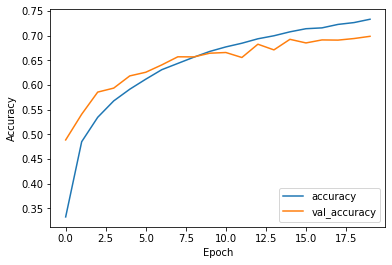

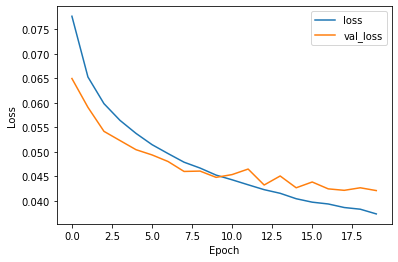

2021-12-03 11:26:32.130900: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 122880000 exceeds 10% of free system memory.


313/313 - 2s - loss: 0.0421 - accuracy: 0.6986
Test accuracy: 0.6985999941825867
Test loss: 0.042110029608011246


In [9]:
# Evaluation
plot_accuracy(history)
plt.show()
plot_loss(history)
plt.show()
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(f"Test accuracy: {test_acc}\nTest loss: {test_loss}")

## Saving the model

lets save the model in an external file 

In [ ]:
#json file containing all model informations
json_file='informations.json'

model_information = {'layers'=layers}
model_name = 'model-first'+'.h5'

model_information['training']=training_info